In [ ]:
import pandas as pd
import sqlite3

# Import the database
from google.colab import files
upload = files.upload()

Saving lahman_1871-2022.sqlite to lahman_1871-2022.sqlite


In [ ]:
# Defining a function so that it is easier to call on this dataframe
def get_data():
    # Getting a database connection
    connection = sqlite3.connect('lahman_1871-2022.sqlite')

    # Writing the SQL Query
    sql_query = "\
        SELECT \
            t.yearID, \
            t.teamID, \
            sum(s.salary) as total_payroll,\
            sum(t.G) as totalGames, \
            sum(t.W) as totalWins,\
            (sum(t.W)* 100.0 / sum(t.G))  as percentWin\
        FROM \
            Teams t \
        JOIN \
            Salaries s ON t.yearID = s.yearID AND t.teamID = s.teamID \
        GROUP BY \
            t.yearID, t.teamID;"

    # Read the returning table as a dataframe
    data = pd.read_sql(sql_query, connection)
    connection.close()
    return data

p1dat = get_data().copy()
print(p1dat)

     yearID teamID  total_payroll  totalGames  totalWins  percentWin
0      1985    ATL     14807000.0        3564       1452   40.740741
1      1985    BAL     11560712.0        3542       1826   51.552795
2      1985    BOS     10897560.0        4075       2025   49.693252
3      1985    CAL     14427894.0        4536       2520   55.555556
4      1985    CHA      9846178.0        3423       1785   52.147239
..      ...    ...            ...         ...        ...         ...
913    2016    SLN    143053500.0        5022       2666   53.086420
914    2016    TBA     57097310.0        4536       1904   41.975309
915    2016    TEX    176038723.0        4698       2755   58.641975
916    2016    TOR    138701700.0        4698       2581   54.938272
917    2016    WAS    141652646.0        4212       2470   58.641975

[918 rows x 6 columns]


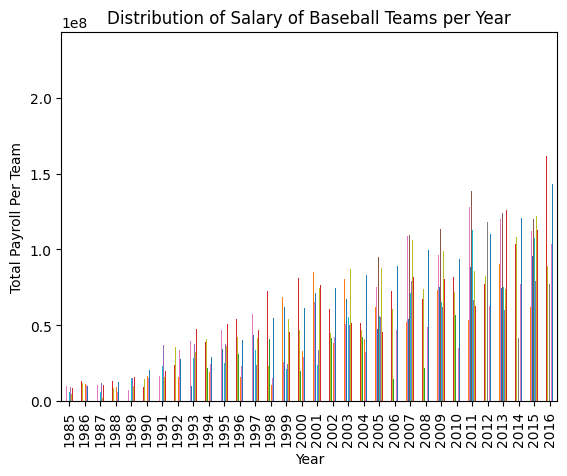

0

In [ ]:
import matplotlib.pyplot as plt


def data_transformation():
    # Here we make the yearID column the new index of our dataframe; teamID column the new columns of our dataframe;
    # and we choose to only return the dataframe that will give us the total payroll of each year
    data = get_data()
    reshaped_data = data.pivot(index='yearID', columns='teamID', values=data.columns.difference(['yearID', 'teamID ']))
    return reshaped_data['total_payroll']



def show_plot(param = data_transformation()):
    # We ask pandas to create a bar plot for us using the data from the
    # transformed data
    param.plot.bar(legend = False)
    plt.xlabel('Year')
    plt.ylabel('Total Payroll Per Team')
    plt.title('Distribution of Salary of Baseball Teams per Year')
    plt.show()
    return 0

show_plot()


Question 1:

Here we created a plot in which all teams, denoted in each color, and their respective total payment, is plotted along the each year. This creates the distribution chart of all team across the majority of baseball seasons.

In terms of the distribution of the data, it looks like it is left skewed.

We can use the median of the data salary as our measure for central tendency. We see that the median is in between years 2010 to 2013. From the left skewedness of the distribution we can assume that generally salaries of baseball teams will increase as time increases

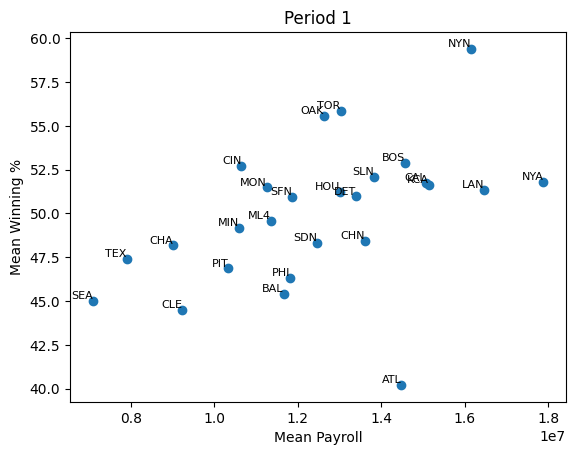

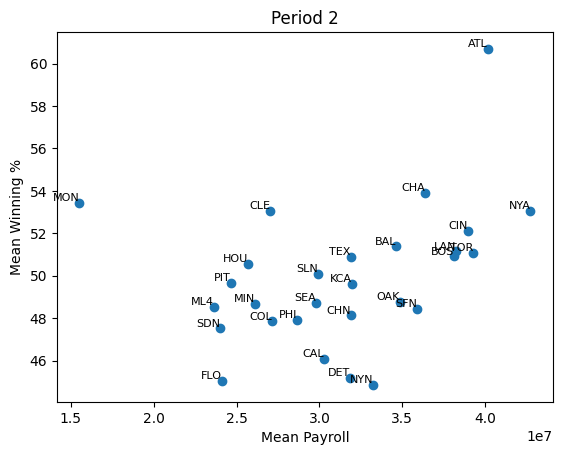

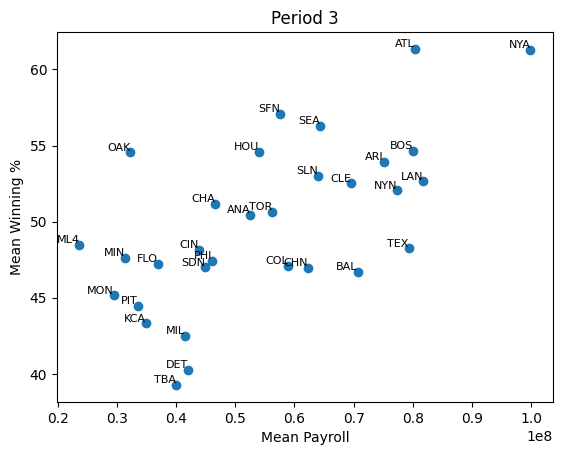

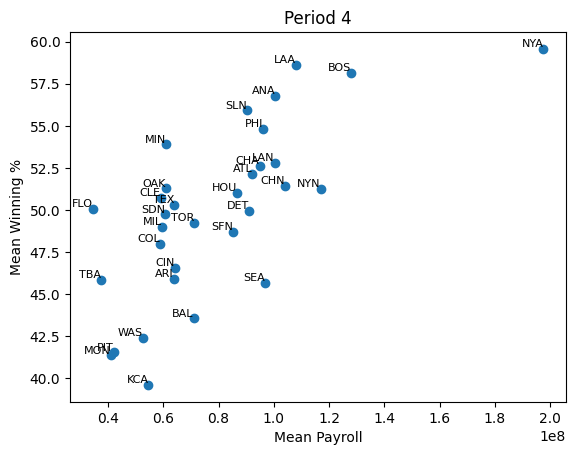

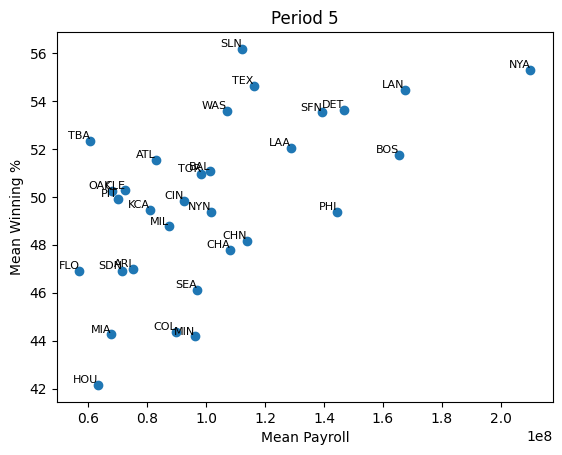

In [ ]:
import numpy as np
p4dat = get_data().copy()

# Denote the number of bins we want
num_bins = 5

# Now create bins in the form of a numpy array
bins = np.linspace(p4dat['yearID'].min() - 1, p4dat['yearID'].max(), num_bins + 1)

# Create a new Pandas column that splits our data into bins, and labels those bins
p4dat['time_bins'] = pd.cut(p4dat['yearID'], bins = bins, labels = [f'Group {i}' for i in range(1, num_bins + 1)])


# Create a plot for our first year period
dat1 = p4dat[p4dat['time_bins'] == 'Group 1']
# We group by our teamID and take the mean of the winning percentage and
# total payroll of each team
dat1 = dat1.groupby('teamID').agg({'percentWin':'mean', 'total_payroll':'mean'})
plt.figure()
plt.scatter(dat1['total_payroll'], dat1['percentWin'])
# Here we label each of our data points
for team, x, y in zip(dat1.index, dat1['total_payroll'], dat1['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 1')
plt.show()



dat2 = p4dat[p4dat['time_bins'] == 'Group 2']
dat2 = dat2.groupby('teamID').agg({'percentWin':'mean', 'total_payroll':'mean'})
plt.figure()
plt.scatter(dat2['total_payroll'], dat2['percentWin'])
for team, x, y in zip(dat2.index, dat2['total_payroll'], dat2['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 2')
plt.show()


dat3 = p4dat[p4dat['time_bins'] == 'Group 3']
dat3 = dat3.groupby('teamID').agg({'percentWin':'mean', 'total_payroll':'mean'})
plt.figure()
plt.scatter(dat3['total_payroll'], dat3['percentWin'])
for team, x, y in zip(dat3.index, dat3['total_payroll'], dat3['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 3')
plt.show()


dat4 = p4dat[p4dat['time_bins'] == 'Group 4']
dat4 = dat4.groupby('teamID').agg({'percentWin':'mean', 'total_payroll':'mean'})
plt.figure()
plt.scatter(dat4['total_payroll'], dat4['percentWin'])
for team, x, y in zip(dat4.index, dat4['total_payroll'], dat4['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 4')
plt.show()


dat5 = p4dat[p4dat['time_bins'] == 'Group 5']
dat5 = dat5.groupby('teamID').agg({'percentWin':'mean', 'total_payroll':'mean'})
plt.figure()
plt.scatter(dat5['total_payroll'], dat5['percentWin'])
for team, x, y in zip(dat5.index, dat5['total_payroll'], dat5['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 5')
plt.show()



Question 2

Here we created 5 different plots. Each plot reflects the time period in which the arithmetic average of the payroll is plotted against the arithemetic average of the winning percentage of the teams in the time period. Each point in each period is labeled with the respective team.

Looking at the plots, we can see that there is a positive correlation between
spending amounts and the winning percentage. Meaning roughly speaking,
as team wins more, we see that the spending amount also increases

There are some teams that stand as outliers in our graphs. In the Period 1,
we see that ATL has a really low winning percentage and yet sitll has one of the highest payroll as well. Other such outliers include NYA in Period 4. Here the
payroll is very high compared the amount they are winning.

OAK spending efficiency across these time periods seems to be really efficient.
Across all time periods, they have a rather small payroll and yet has above average winning percentages

In [ ]:
def standardized_data():
    dat = get_data().copy()

    # Return an array that contains all unique values
    # in the yearID of the dataframe
    years = dat['yearID'].unique()

    new_column = []
    for year in years:
        # Find the standard deviation of payroll that year
        std_payroll = dat[dat['yearID'] == year]['total_payroll'].std()

        # Find the mean of the payroll for that year
        mean_payroll = dat[dat['yearID'] == year]['total_payroll'].mean()

        # Append our new values
        for i in dat[dat['yearID'] == year]['total_payroll'].iloc[:]:
            x = (i - std_payroll)/mean_payroll
            new_column.append(x)


    dat['standarized_payroll'] = new_column
    return dat

print(standardized_data())

     yearID teamID  total_payroll  totalGames  totalWins  percentWin  \
0      1985    ATL     14807000.0        3564       1452   40.740741   
1      1985    BAL     11560712.0        3542       1826   51.552795   
2      1985    BOS     10897560.0        4075       2025   49.693252   
3      1985    CAL     14427894.0        4536       2520   55.555556   
4      1985    CHA      9846178.0        3423       1785   52.147239   
..      ...    ...            ...         ...        ...         ...   
913    2016    SLN    143053500.0        5022       2666   53.086420   
914    2016    TBA     57097310.0        4536       1904   41.975309   
915    2016    TEX    176038723.0        4698       2755   58.641975   
916    2016    TOR    138701700.0        4698       2581   54.938272   
917    2016    WAS    141652646.0        4212       2470   58.641975   

     standarized_payroll  
0               1.224364  
1               0.902169  
2               0.836352  
3               1.186737  


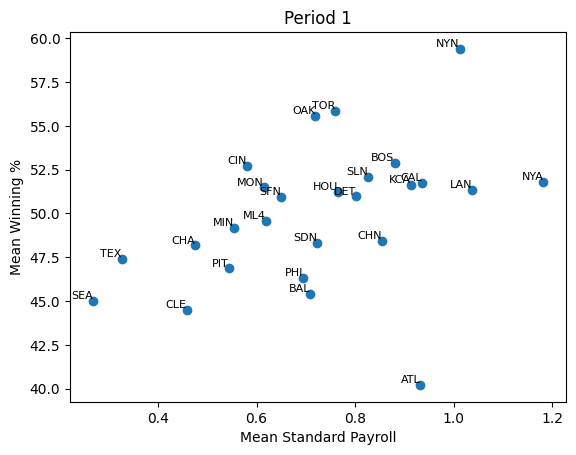

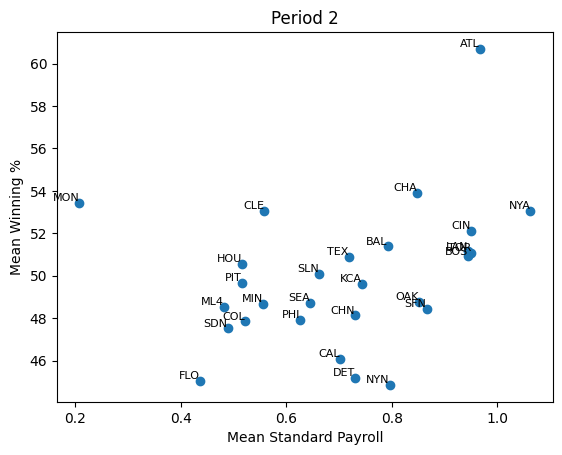

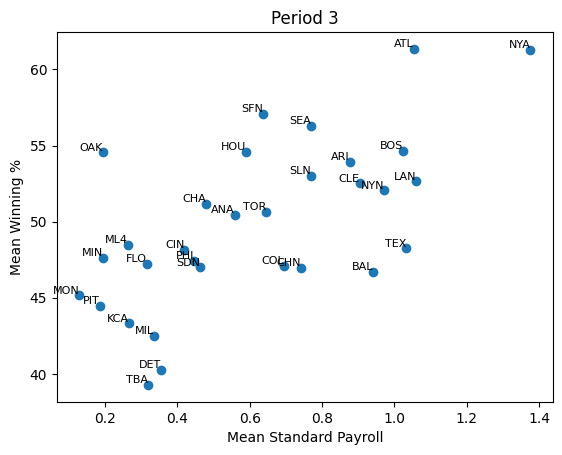

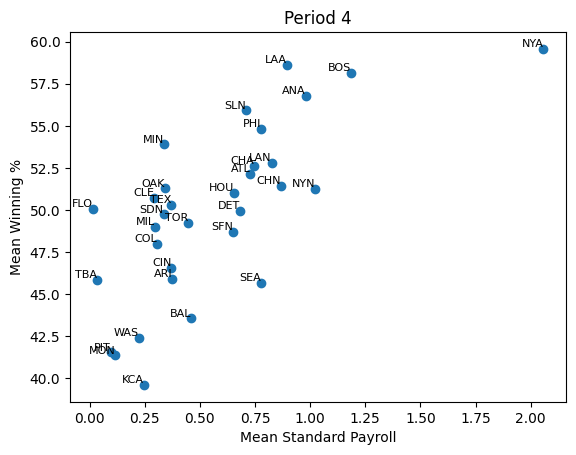

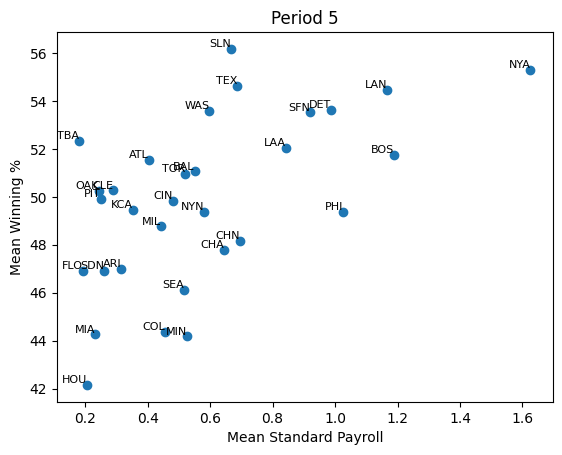

In [ ]:
p6dat = standardized_data().copy()

# We repeat the same steps as from problem 4
num_bins = 5
bins = np.linspace(p6dat['yearID'].min() - 1, p6dat['yearID'].max(), num_bins + 1)


p6dat['time_bins'] = pd.cut(p6dat['yearID'], bins = bins, labels = [f'Group {i}' for i in range(1, num_bins + 1)])



dat1 = p6dat[p6dat['time_bins'] == 'Group 1']
dat1 = dat1.groupby('teamID').agg({'percentWin':'mean', 'standarized_payroll':'mean'})
plt.figure()
plt.scatter(dat1['standarized_payroll'], dat1['percentWin'])
for team, x, y in zip(dat1.index, dat1['standarized_payroll'], dat1['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Standard Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 1')
plt.show()



dat2 = p6dat[p6dat['time_bins'] == 'Group 2']
dat2 = dat2.groupby('teamID').agg({'percentWin':'mean', 'standarized_payroll':'mean'})
plt.figure()
plt.scatter(dat2['standarized_payroll'], dat2['percentWin'])
for team, x, y in zip(dat2.index, dat2['standarized_payroll'], dat2['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 2')
plt.show()


dat3 = p6dat[p6dat['time_bins'] == 'Group 3']
dat3 = dat3.groupby('teamID').agg({'percentWin':'mean', 'standarized_payroll':'mean'})
plt.figure()
plt.scatter(dat3['standarized_payroll'], dat3['percentWin'])
for team, x, y in zip(dat3.index, dat3['standarized_payroll'], dat3['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 3')
plt.show()


dat4 = p6dat[p6dat['time_bins'] == 'Group 4']
dat4 = dat4.groupby('teamID').agg({'percentWin':'mean', 'standarized_payroll':'mean'})
plt.figure()
plt.scatter(dat4['standarized_payroll'], dat4['percentWin'])
for team, x, y in zip(dat4.index, dat4['standarized_payroll'], dat4['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 4')
plt.show()


dat5 = p6dat[p6dat['time_bins'] == 'Group 5']
dat5 = dat5.groupby('teamID').agg({'percentWin':'mean', 'standarized_payroll':'mean'})
plt.figure()
plt.scatter(dat5['standarized_payroll'], dat5['percentWin'])
for team, x, y in zip(dat5.index, dat5['standarized_payroll'], dat5['percentWin']):
    plt.text(x, y, team, fontsize=8, ha='right', va='bottom')
plt.xlabel('Mean Standardized Payroll')
plt.ylabel('Mean Winning %')
plt.title('Period 5')
plt.show()

Question 3

Here we replotted our 5 data sets. This time we standardized the pay in order to better compare our data values between different periods.

After applying our transformations we see that the range for the each data point has been moved.
Although each data point is still in relative position to each other, we see that each data point is
on the same scale as the other points.


Showing the expected win percentage from the regression line 
0      53.060909
1      52.255423
2      52.090879
3      52.966843
4      51.830005
         ...    
913    51.928360
914    50.209299
915    52.588040
916    51.841327
917    51.900343
Name: expected_win_pct, Length: 918, dtype: float64




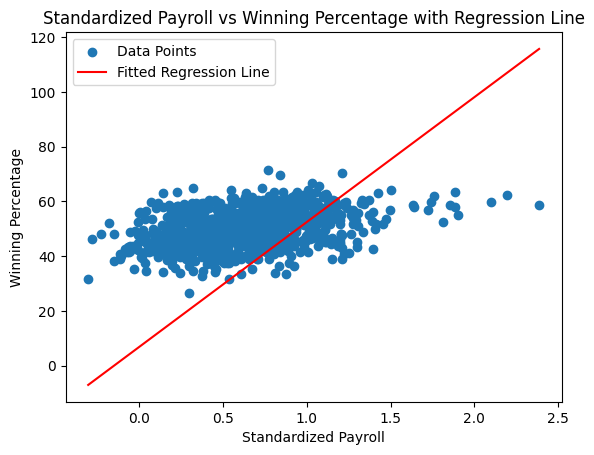

In [ ]:
p7dat = standardized_data().copy()

def get_p7_plot(dat = p7dat):
    # Using numpy polyfit we try to fit a line on to our data
    lin_reg = np.polyfit(dat['standarized_payroll'],dat['percentWin'], 1)

    x = np.linspace(dat['standarized_payroll'].min(), dat['standarized_payroll'].max(), 100)
    # Create numbers using our fitted parameters so that we can plot
    y = lin_reg[0] + (lin_reg[1] * x)
    plt.figure()
    plt.scatter(dat['standarized_payroll'], dat['percentWin'], label = 'Data Points')
    plt.plot(x, y, color = 'red', label = 'Fitted Regression Line')
    plt.title('Standardized Payroll vs Winning Percentage with Regression Line')
    plt.xlabel('Standardized Payroll')
    plt.ylabel('Winning Percentage')
    plt.legend()
    plt.show



def regression_dat(dat = p7dat):
    years = dat['yearID'].unique()

    new_column = []
    for year in years:
        for i in (dat[dat['yearID'] == year]['standarized_payroll']):
            x = 50 + (2.5 * i)
            new_column.append(x)


    dat['expected_win_pct'] = new_column
    return dat

print(f"Showing the expected win percentage from the regression line \n{regression_dat()['expected_win_pct']}")
print("\n")

get_p7_plot()



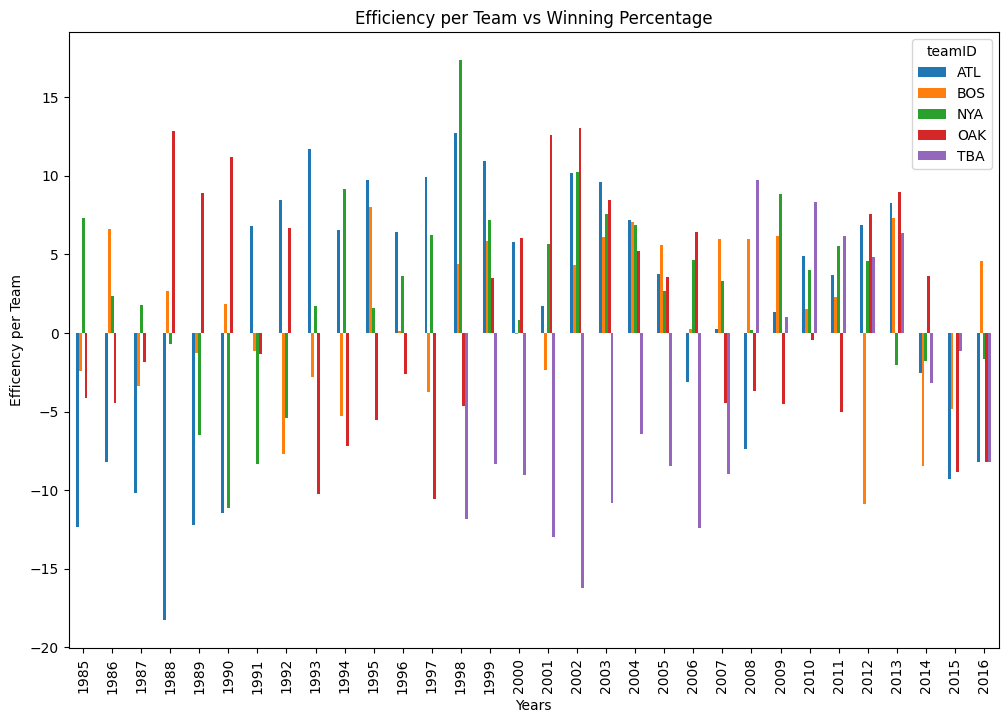

In [ ]:
dat = regression_dat().copy()

dat['efficiency'] = dat['percentWin'] - dat['expected_win_pct']

x = dat[dat['teamID'].isin(['OAK', 'BOS', 'NYA', 'ATL', 'TBA'])].reset_index(drop = True)

# We pivot the dataframe by making the yearID into the index, and make the
# teamID column into the column index of our new dataframe.
reshaped_x = x.pivot(index='yearID', columns='teamID', values=x.columns.difference(['yearID', 'teamID ']))

# Here we only choose where the data is aggregated on
reshaped_x['efficiency'].plot.bar(legend = True, figsize = (12, 8))
plt.xlabel('Years')
plt.ylabel('Efficency per Team')
plt.title('Efficiency per Team vs Winning Percentage')
plt.show()

Q4

During the Moneyball period, we find that the Oaklands continue to have great money efficiency. Paired with information from question 2 and 3, the performance to payroll ratio of Oaklands is high. It meant that
the Oaklands got more performance for each dollar invested into their payroll.